In [5]:
# import libraries
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

At this point, ensure that you have all sales in a dataframe.

In [3]:
output_csv_path = r'C:\Users\16476\Downloads\ML-supervised_real_estate_data\data\processed_data.csv'
df = pd.read_csv(output_csv_path)

- Is each cell one value, or do some cells have lists?

In [6]:
df.head()

,last_update_date,tags,permalink,status,list_date,open_houses,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,other_listings,branding.name,branding.photo,branding.type,source.agents.office_name,other_listings.rdc.listing_id,other_listings.rdc.listing_key,other_listings.rdc.status,other_listings.rdc.primary,community.advertisers,community.description.name
0,2023-09-19T20:52:50Z,"['carport', 'community_outdoor_space', 'cul_de...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,False,554950.0,9.074431e+09,"[{'tags': [{'label': 'house_view', 'probabilit...",False,False,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,NaN,mls,1963.0,False,2023-09-18,False,2.0,False,False,10454.0,1821.0,2.0,NaN,False,1.0,NaN,3.0,single_family,True,False,False,False,False,False,False,False,False,False,False,basic_opt_in,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,EXP Realty LLC - Southeast Alaska,False,Office,EXP Realty LLC - Southeast Alaska,2.957242e+09,NaN,sold,True,NaN,NaN
1,NaN,NaN,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,False,NaN,9.424984e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,Non-Member Office,2.957023e+09,NaN,off_market,False,NaN,NaN
2,NaN,NaN,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,False,NaN,9.479069e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
3,NaN,NaN,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,False,NaN,9.879332e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
4,NaN,NaN,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,False,NaN,9.521640e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958925e+

- What are the data types of each column?

In [623]:
# display all columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
last_update_date                          object
tags                                      object
permalink                                 object
status                                    object
list_date                                 object
open_houses                               object
list_price                                object
property_id                              float64
photos                                    object
community                                 object
virtual_tours                             object
listing_id                                object
price_reduced_amount                      object
matterport                                object
primary_photo.href                        object
source.plan_id                            object
source.spec_id                            object
source.type                               object
description.year_built                    object
description.baths_3qtr                 

- Some sales may not actually include the sale price. These rows should be dropped.

In [624]:
# number of rows before dropping
rows_before = len(df)

# drop rows without 'description.sold_price' (target variable)
df = df.dropna(subset=['description.sold_price'])

# number of rows after dropping
rows_after = len(df)

# calculate the number of rows dropped
rows_dropped = rows_before - rows_after

# print the number of rows dropped
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 37


- There are a lot of None values.  Should these be dropped or replaced with something?

In [625]:
# check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
last_update_date                          0.416973
tags                                      6.217807
permalink                                 0.000000
status                                    0.000000
list_date                                 4.881040
open_houses                               0.000000
list_price                                5.261221
property_id                               0.000000
photos                                    8.891342
community                                 2.575423
virtual_tours                            74.540103
listing_id                                4.881040
price_reduced_amount                     68.297768
matterport                                0.000000
primary_photo.href                        9.271523
source.plan_id                           17.525141
source.spec_id                           17.525141
source.type                               4.991415
description.year_built               

In [626]:
# calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# define a threshold for dropping columns (e.g., rule of thumb: more than 50% missing values)
threshold = 50

# identify columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# print the dropped columns
print(f"Dropped columns: {columns_to_drop}")

# display the remaining columns
print("Remaining columns after dropping:")
print(df.columns)

Dropped columns: Index(['virtual_tours', 'price_reduced_amount', 'description.baths_half',
       'description.sub_type', 'branding.photo', 'source.agents.office_name',
       'primary_photo', 'source', 'other_listings', 'community.advertisers',
       'community.description.name'],
      dtype='object')
Remaining columns after dropping:
Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'list_price', 'property_id', 'photos', 'community',
       'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.baths_1qtr', 'description.garage', 'description.stories',
       'description.beds', 'description.type',
       'lead_attributes.show_contact_an_

In [627]:
# list of irrelevant columns to drop
columns_to_drop = ['last_update_date', 'permalink', 'status', 'open_houses', 'list_price', 'property_id', 'photos', 'community', 
                   'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id', 'source.spec_id', 'source.type', 
                   'location.street_view_url', 'matterport', 'description.name', 'description.baths_1qtr', 
                   'lead_attributes.show_contact_an_agent', 'flags.is_new_construction', 'flags.is_for_rent', 'flags.is_subdivision', 
                   'flags.is_contingent', 'flags.is_pending', 'flags.is_plan', 'flags.is_coming_soon', 'flags.is_new_listing', 
                   'products.brand_name', 'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat', 
                   'location.address.state_code', 'location.address.line', 'location.street_view_url', 'location.county.fips_code', 'branding.type', 
                   'other_listings.rdc.listing_id', 'other_listings.rdc.listing_key', 'other_listings.rdc.status', 'other_listings.rdc.primary']

# drop the specified columns
df = df.drop(columns=columns_to_drop)

In [628]:
# Convert date columns to datetime
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce').dt.tz_localize(None)
df['description.sold_date'] = pd.to_datetime(df['description.sold_date'], errors='coerce').dt.tz_localize(None)

# Convert year built to integer
df['description.year_built'] = pd.to_numeric(df['description.year_built'], errors='coerce').astype('Int64')

# Convert baths_3qtr, baths_full, and other bath-related columns to numeric
df['description.baths_3qtr'] = pd.to_numeric(df['description.baths_3qtr'], errors='coerce').astype('Int64')
df['description.baths_full'] = pd.to_numeric(df['description.baths_full'], errors='coerce').astype('Int64')
df['description.baths'] = pd.to_numeric(df['description.baths'], errors='coerce').astype('float')
df['description.garage'] = pd.to_numeric(df['description.garage'], errors='coerce').astype('Int64')

# Convert sold_price, lot_sqft, and sqft to numeric
df['description.sold_price'] = pd.to_numeric(df['description.sold_price'], errors='coerce').astype('float')
df['description.lot_sqft'] = pd.to_numeric(df['description.lot_sqft'], errors='coerce').astype('Int64')
df['description.sqft'] = pd.to_numeric(df['description.sqft'], errors='coerce').astype('Int64')

# Convert stories and beds to integer
df['description.stories'] = pd.to_numeric(df['description.stories'], errors='coerce').astype('Int64')
df['description.beds'] = pd.to_numeric(df['description.beds'], errors='coerce').astype('Int64')

# Convert type to string
df['description.type'] = df['description.type'].astype(str)

# Convert flags to boolean
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].astype(bool)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].astype(bool)

# Convert location and branding columns to string
df['location.address.state'] = df['location.address.state'].astype(str)
df['location.address.city'] = df['location.address.city'].astype(str)
df['location.county.name'] = df['location.county.name'].astype(str)
df['branding.name'] = df['branding.name'].astype(str)

# Display the DataFrame with updated types
print(df.dtypes)

tags                              object
list_date                 datetime64[ns]
description.year_built             Int64
description.baths_3qtr             Int64
description.sold_date     datetime64[ns]
description.sold_price           float64
description.baths_full             Int64
description.lot_sqft               Int64
description.sqft                   Int64
description.baths                float64
description.garage                 Int64
description.stories                Int64
description.beds                   Int64
description.type                  object
flags.is_price_reduced              bool
flags.is_foreclosure                bool
location.address.state            object
location.address.city             object
location.county.name              object
branding.name                     object
dtype: object


In [629]:
# function to cap outliers at a specified percentile
def cap_outliers(df, cols, lower_percentile=0.05, upper_percentile=0.95):
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# identify all numerical columns to cap outliers
numerical_cols_to_cap = df.select_dtypes(include=['number']).columns

# cap outliers in these numerical columns
df = cap_outliers(df, numerical_cols_to_cap)

- Some sales don't include the property type.

In [630]:
# Select categorical columns (excluding 'tags') and boolean columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols = categorical_cols.drop('tags', errors='ignore')  # Drop 'tags' if it exists in the selection

# Impute missing values for categorical columns using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Display the DataFrame to verify the imputation
print(df[categorical_cols].isnull().sum())

description.type          0
flags.is_price_reduced    0
flags.is_foreclosure      0
location.address.state    0
location.address.city     0
location.county.name      0
branding.name             0
dtype: int64


In [631]:
# Select columns with numeric values of datatype 'Int64' and 'float64'
numerical_cols = df.select_dtypes(include=['Int64', 'float64']).columns

# Impute missing values for numerical columns using the median strategy
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify the imputation
print(df[numerical_cols].isnull().sum())

description.year_built    0
description.baths_3qtr    0
description.sold_price    0
description.baths_full    0
description.lot_sqft      0
description.sqft          0
description.baths         0
description.garage        0
description.stories       0
description.beds          0
dtype: int64


In [632]:
# Impute missing values for datetime columns
# Calculate the midpoint date for rows with missing values
def calculate_midpoint_date(row):
    dates = pd.to_datetime([row['description.sold_date'], row['list_date']])
    return dates.mean()

df['midpoint_date'] = df.apply(calculate_midpoint_date, axis=1)

# Fill missing values with the midpoint date
df['description.sold_date'].fillna(df['midpoint_date'], inplace=True)
df['list_date'].fillna(df['midpoint_date'], inplace=True)

# Drop the midpoint_date column as it is no longer needed
df.drop(columns=['midpoint_date'], inplace=True)

# Verify the imputation
print(df[['list_date', 'description.sold_date']].isnull().sum())

list_date                0
description.sold_date    0
dtype: int64


/var/folders/z_/3l7r4ptn5pl3mhtr5mj_jy040000gn/T/ipykernel_15599/1331988585.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description.sold_date'].fillna(df['midpoint_date'], inplace=True)
/var/folders/z_/3l7r4ptn5pl3mhtr5mj_jy040000gn/T/ipykernel_15599/1331988585.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [633]:
# Feature engineer new column called 'days_on_market'

# Calculate the days on market
df['days_on_market'] = (df['description.sold_date'] - df['list_date']).dt.days

# Check for negative days on market
negative_days_mask = df['days_on_market'] < 0

# Print the count of negative days
print(f"Count of negative days on market: {negative_days_mask.sum()}")

#Treat negative values as NaN
df.loc[negative_days_mask, 'days_on_market'] = np.nan

# Drop the original date columns as they are no longer needed
df.drop(columns=['description.sold_date', 'list_date'], inplace=True)

Count of negative days on market: 337


Consider the fact that with tags, there are a lot of categorical variables.
- Maybe the "tags" will help create some features.
- Perhaps we can get rid of tags that have a low frequency.

In [ ]:
# # Function to convert string representation of list to actual list
# def convert_to_list(x):
#     try:
#         if isinstance(x, str):
#             return ast.literal_eval(x)
#         elif isinstance(x, list):
#             return x
#         elif isinstance(x, bool):
#             return []
#         else:
#             return []
#     except (ValueError, SyntaxError):
#         return []

# # Convert string to list and handle NaN and non-list values
# df['tags'] = df['tags'].apply(lambda x: convert_to_list(x) if isinstance(x, (str, list, bool)) else [])

# # Initialize MultiLabelBinarizer
# mlb = MultiLabelBinarizer()

# # Perform one-hot encoding
# one_hot_encoded = mlb.fit_transform(df['tags'])

# # Create a DataFrame with the one-hot encoded tags
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# # Concatenate the new DataFrame with the original DataFrame
# df = pd.concat([df, one_hot_encoded_df], axis=1)

# # Drop the original 'tags' column if no longer needed
# df.drop('tags', axis=1, inplace=True)

# # Display the updated DataFrame
# df.columns

In [635]:
import ast
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Function to convert string representation of list to actual list
def convert_to_list(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        elif isinstance(x, bool) or pd.isna(x):
            return []
        else:
            return []
    except (ValueError, SyntaxError):
        return []

# Convert string to list and handle NaN and non-list values
df['tags'] = df['tags'].apply(lambda x: convert_to_list(x) if isinstance(x, (str, list, bool, float)) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Perform one-hot encoding
one_hot_encoded = mlb.fit_transform(df['tags'])

# Create a DataFrame with the one-hot encoded tags
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'tags' column if no longer needed
df.drop('tags', axis=1, inplace=True)

# Display the updated DataFrame
print(df.columns)


Index(['description.year_built', 'description.baths_3qtr',
       'description.sold_price', 'description.baths_full',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=173)


- How many columns would we have if we OHE tags, city and state?

In [636]:
# Handle NaN values explicitly
df['description.type'] = df['description.type'].replace('nan', np.nan).fillna('unknown')
df['location.address.city'] = df['location.address.city'].fillna('unknown')
df['location.address.state'] = df['location.address.state'].fillna('unknown')
df['location.county.name'] = df['location.county.name'].fillna('unknown')
df['branding.name'] = df['branding.name'].fillna('unknown')
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].fillna(False)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].fillna(False)

# One-hot encode the specified columns
columns_to_encode = [
    'description.type', 'location.address.city', 'location.address.state', 
    'location.county.name', 'branding.name', 
    'flags.is_price_reduced', 'flags.is_foreclosure'
]

# One-hot encoding for the specified columns
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

/var/folders/z_/3l7r4ptn5pl3mhtr5mj_jy040000gn/T/ipykernel_15599/1757461247.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['flags.is_price_reduced'] = df['flags.is_price_reduced'].fillna(False)
/var/folders/z_/3l7r4ptn5pl3mhtr5mj_jy040000gn/T/ipykernel_15599/1757461247.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['flags.is_foreclosure'] = df['flags.is_foreclosure'].fillna(False)


In [637]:
# Initialize the SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Apply the numerical imputer to numerical columns
df_imputed = num_imputer.fit_transform(df)

# Convert back to DataFrame with original column names
df = pd.DataFrame(df_imputed, columns=df.columns)

In [638]:
# Function to cap outliers at a specified percentile
def cap_outliers(df, cols, lower_percentile=0.05, upper_percentile=0.95):
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Specify the columns to cap outliers
columns_to_cap = [
    'days_on_market',
    'description.year_built',
    'description.sold_price',
    'description.lot_sqft',
    'description.sqft'
]

# Cap outliers in these specific columns
df = cap_outliers(df, columns_to_cap)

In [639]:
# Save the combined DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")

Data saved to /Users/elizaclapasmac/Desktop/Repositories/data_project_midterm/data/processed_data.csv


- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [26]:
# Load Data
df = pd.read_csv(output_csv_path)

## Summary Statistics

In [640]:
# Summary Statistics
def summary_statistics(df, columns):
    print("Summary Statistics:")
    print(df[columns].describe())
    print("\nData Types:")
    print(df[columns].dtypes)
    print("\nMissing Values:")
    print(df[columns].isnull().sum())

# List of specific columns to include in the summary statistics
columns = [
    'description.year_built', 'description.baths_3qtr', 'description.sold_price',
    'description.baths_full', 'description.lot_sqft', 'description.sqft',
    'description.baths', 'description.garage', 'description.stories',
    'description.beds', 'days_on_market'
]

# Call the function with the dataframe and specified columns
summary_statistics(df, columns)

Summary Statistics:
       description.year_built  description.baths_3qtr  description.sold_price  \
count             8191.000000             8191.000000             8191.000000   
mean              1970.087424                1.016188           349747.199284   
std                 31.030424                0.125922           202621.947024   
min               1904.500000                1.000000            62250.000000   
25%               1952.000000                1.000000           220000.000000   
50%               1975.000000                1.000000           314000.000000   
75%               1994.000000                1.000000           427900.000000   
max               2016.000000                2.000000           874900.000000   

       description.baths_full  description.lot_sqft  description.sqft  \
count             8191.000000           8191.000000       8191.000000   
mean                 1.842531          12543.621150       1825.771033   
std                  0.649393  

## Interpretation of Summary Statistics

### description.year_built
- **Count**: 8,186 properties have recorded year built data.
- **Mean**: The average year properties were built is 1969. This indicates that, on average, the properties in the dataset are relatively old, with many likely built in the mid-20th century.
- **Std**: The standard deviation of 31.6 years suggests a wide range of construction dates, indicating a mix of older and newer properties.
- **Min/Max**: Properties range from being built as early as 1900 to as recently as 2017. This highlights the historical breadth of the dataset, with some properties over a century old and others quite modern.
- **Percentiles**:
  - 25%: Built in or before 1952.
  - 50% (median): Built in 1975, indicating half of the properties were built before this year.
  - 75%: Built in or after 1994.

### description.baths_3qtr
- **Count**: 8,186 properties.
- **Mean**: The average is approximately 1.02 three-quarter baths per property, indicating that most properties have around one three-quarter bath.
- **Std**: Standard deviation is 0.13, showing little variation around the mean.
- **Min/Max**: Properties have between 1 to 2 three-quarter baths.
- **Percentiles**:
  - 25%: 1
  - 50% (median): 1
  - 75%: 1

### description.sold_price
- **Count**: 8,186 properties.
- **Mean**: The average sold price is $355,222. This indicates a relatively high average property price, suggesting that the dataset might be skewed towards more expensive real estate markets.
- **Std**: The standard deviation of $219,376 indicates substantial variation in property prices, reflecting a diverse range of property values.
- **Min/Max**: Prices range from $54,167 to $1,002,500, indicating a significant spread from lower-end to luxury properties.
- **Percentiles**:
  - 25%: $220,000
  - 50% (median): $314,000
  - 75%: $427,900

### description.baths_full
- **Count**: 8,186 properties.
- **Mean**: The average is about 1.84 full baths per property, suggesting most properties have around 2 full bathrooms.
- **Std**: Standard deviation is 0.65, indicating some variability in the number of full bathrooms.
- **Min/Max**: Properties have between 1 to 3 full baths.
- **Percentiles**:
  - 25%: 1
  - 50% (median): 2
  - 75%: 2

### description.lot_sqft
- **Count**: 8,186 properties.
- **Mean**: The average lot size is 13,036 square feet, indicating relatively large lot sizes, possibly suburban or rural properties.
- **Std**: The standard deviation of 16,166 square feet suggests considerable variability, with some properties having very large lots.
- **Min/Max**: Lot sizes range from 1,307 to 72,745 square feet.
- **Percentiles**:
  - 25%: 5,663 square feet
  - 50% (median): 7,841 square feet
  - 75%: 11,539 square feet

### description.sqft
- **Count**: 8,186 properties.
- **Mean**: The average square footage of properties is 1,829 square feet, indicating a mix of small to mid-sized homes.
- **Std**: The standard deviation of 772 square feet suggests a range of property sizes.
- **Min/Max**: Property sizes range from 800 to 3,860 square feet.
- **Percentiles**:
  - 25%: 1,300 square feet
  - 50% (median): 1,635 square feet
  - 75%: 2,160 square feet

### description.baths
- **Count**: 8,186 properties.
- **Mean**: The average total number of baths is approximately 2.08.
- **Std**: Standard deviation is 1.03, showing variability in the total number of bathrooms.
- **Min/Max**: Properties have between 0 to 4 baths.
- **Percentiles**:
  - 25%: 1
  - 50% (median): 2
  - 75%: 3

### description.garage
- **Count**: 8,186 properties.
- **Mean**: The average number of garages is about 1.93, suggesting most properties have 2 garages.
- **Std**: Standard deviation is 0.45, indicating slight variability.
- **Min/Max**: Properties have between 1 to 3 garages.
- **Percentiles**:
  - 25%: 2
  - 50% (median): 2
  - 75%: 2

### description.stories
- **Count**: 8,186 properties.
- **Mean**: The average number of stories is about 1.42, indicating that most properties are single-story with some two-story homes.
- **Std**: Standard deviation is 0.60, showing some variability.
- **Min/Max**: Properties have between 1 to 3 stories.
- **Percentiles**:
  - 25%: 1
  - 50% (median): 1
  - 75%: 2

### description.beds
- **Count**: 8,186 properties.
- **Mean**: The average number of bedrooms is about 3.16.
- **Std**: Standard deviation is 0.84, indicating some variability in bedroom count.
- **Min/Max**: Properties have between 2 to 5 bedrooms.
- **Percentiles**:
  - 25%: 3
  - 50% (median): 3
  - 75%: 4

### days_on_market
- **Count**: 8,186 properties.
- **Mean**: The average days on the market is approximately 76.3 days.
- **Std**: The standard deviation is 80.7 days, indicating high variability.
- **Min/Max**: Properties have been on the market from 0 to 2,236 days. This suggests that while some properties sell very quickly, others remain on the market for extended periods.
- **Percentiles**:
  - 25%: 39 days
  - 50% (median): 62 days
  - 75%: 92 days

### Data Types
- All columns have been converted to `float64`.

### Missing Values
- There are no missing values in any of the columns.

### Interpretation
The dataset consists of various real estate features with no missing values. The properties are quite diverse in terms of age, size, and price. The negative values in `days_on_market` need further investigation as they suggest potential data quality issues. The data reflects a mix of older and newer properties, with considerable variability in features such as lot size, square footage, and price. This diversity can provide a robust basis for modeling and analysis.

## Plot Distributions

In [645]:
# Function to plot distribution of a specified column
def plot_distribution(df, column, filename = 'plot.png'):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        # Save the plot as an image file
        plt.savefig(filename)
        plt.show()
        
    else:
        print(f"Column {column} not found in DataFrame")

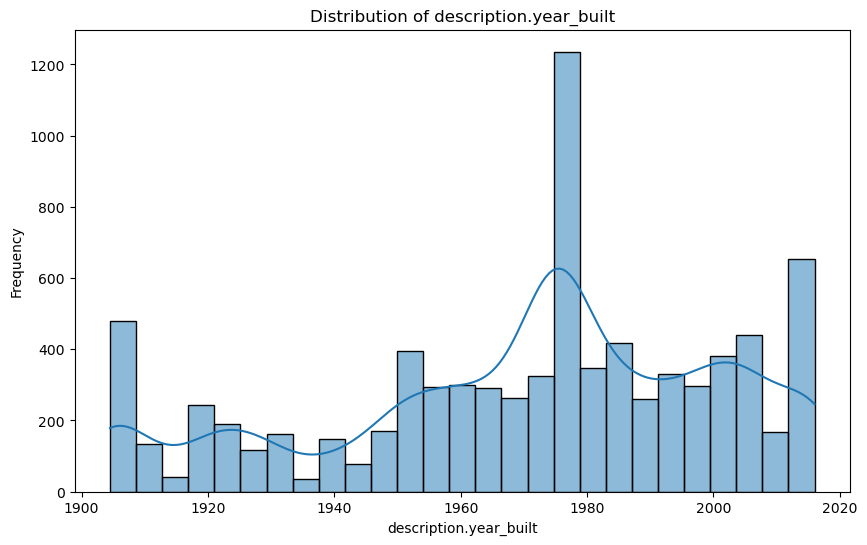

In [648]:
plot_distribution(df, 'description.year_built', 'Year Built Distribution')

### Interpretation of the Distribution of `description.year_built`

The histogram displays the frequency distribution of the year properties were built (`description.year_built`). The x-axis represents the year properties were built, ranging from 1900 to 2020, and the y-axis represents the frequency, or the number of properties built in each year bin. The blue bars indicate the count of properties built in each time period, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Construction Years:**
   - There is considerable variability in the years properties were built, with notable peaks and troughs over time.

2. **Peak Around 1980:**
   - The highest peak occurs around 1980, indicating a significant surge in the number of properties built during this period. This could be due to various factors such as economic conditions, housing policies, or demographic changes at that time.

3. **Early 1900s Construction:**
   - There is a smaller peak around the early 1900s, showing that a substantial number of properties were built around that time.

4. **Post-1980s Construction:**
   - After the peak in 1980, there is a noticeable decline, followed by smaller, steady increases in property construction in the 1990s and early 2000s.

5. **Recent Construction:**
   - There is another increase in properties built closer to 2016, indicating a more recent uptick in construction activities.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around the early 1900s, 1980, and a slight increase towards 2016.

### Conclusion:
The histogram indicates periods of significant property construction activity, especially around 1980 and the early 1900s, with a more recent increase towards 2016. This distribution could provide insights into housing market trends, urban development phases, and historical economic conditions influencing property construction over the last century.

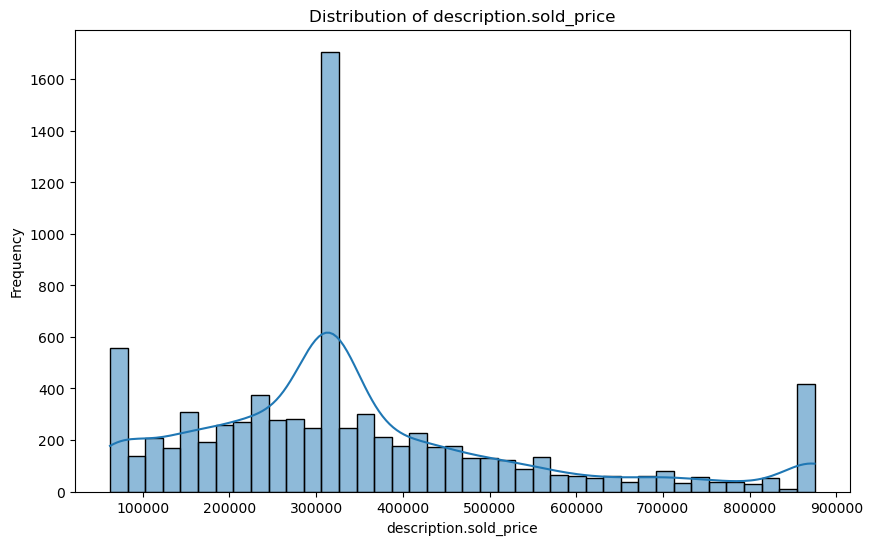

In [649]:
plot_distribution(df, 'description.sold_price', 'Sold Price Distribution')

### Interpretation of the Distribution of `description.sold_price`

The histogram displays the frequency distribution of the sold prices of properties (`description.sold_price`). The x-axis represents the sold price of the properties, ranging from $0 to $900,000, and the y-axis represents the frequency, or the number of properties sold within each price bin. The blue bars indicate the count of properties sold at different price points, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Sold Prices:**
   - There is considerable variability in the sold prices, with a noticeable concentration of properties sold within certain price ranges.

2. **Major Peak Around $300,000:**
   - The highest peak occurs around $300,000, indicating a significant number of properties were sold at this price point. This could suggest that $300,000 is a common price for properties in the dataset.

3. **Secondary Peaks:**
   - There are smaller peaks around $100,000 and $800,000, indicating additional clusters of properties sold at these price points.

4. **Low to Mid-Range Prices:**
   - A substantial number of properties are sold in the lower price ranges, between $100,000 and $300,000. This suggests that a significant portion of the properties are more affordable.

5. **Higher-End Prices:**
   - Fewer properties are sold at higher prices, above $500,000. The frequency decreases as the price increases, with a slight increase again near $800,000.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around $300,000, $100,000, and $800,000, showing the distribution's shape and spread.

### Conclusion:
The histogram indicates that most properties are sold at around $300,000, with significant numbers also sold at lower prices, around $100,000, and fewer at higher prices, with another peak near $800,000. This distribution can provide insights into the pricing trends within the dataset and can help in understanding the market's affordability and distribution of property values.

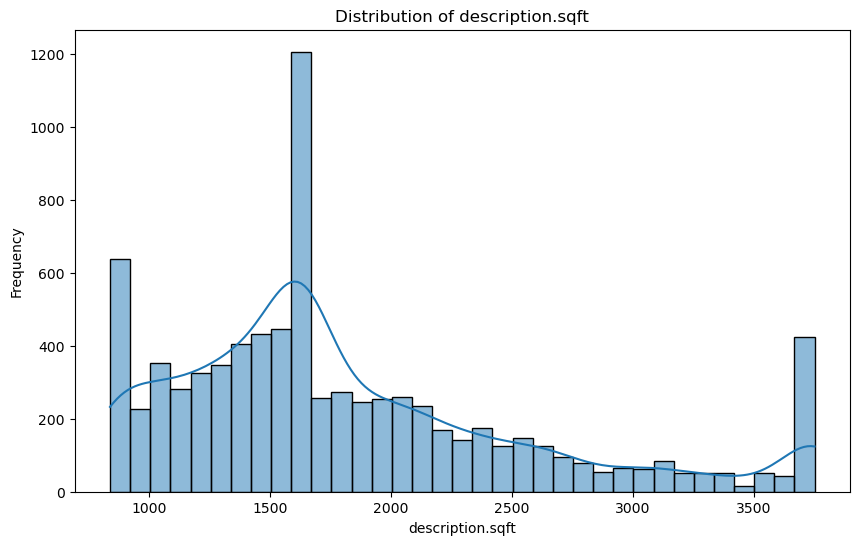

In [651]:
plot_distribution(df, 'description.sqft', 'Sq.Ft. Distribution.png')

### Interpretation of the Distribution of `description.sqft`

The histogram displays the frequency distribution of the square footage of properties (`description.sqft`). The x-axis represents the square footage of the properties, ranging from 0 to 3,500 square feet, and the y-axis represents the frequency, or the number of properties within each square footage bin. The blue bars indicate the count of properties in each square footage range, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Square Footage:**
   - There is significant variability in the square footage of the properties, with different peaks indicating common property sizes.

2. **Major Peak Around 1,500 Square Feet:**
   - The highest peak occurs around 1,500 square feet, indicating a large number of properties are of this size. This suggests that 1,500 square feet is a common property size in the dataset.

3. **Secondary Peaks:**
   - There are smaller peaks around 1,000 and 3,500 square feet. These indicate additional clusters of properties at these sizes.

4. **Low to Mid-Range Sizes:**
   - A substantial number of properties have sizes between 1,000 and 2,000 square feet. This suggests that most properties in the dataset are within this range.

5. **Higher-End Sizes:**
   - Fewer properties are larger than 2,500 square feet. The frequency decreases as the square footage increases, indicating fewer large properties.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around 1,000, 1,500, and 3,500 square feet, showing the distribution's shape and spread.

### Conclusion:
The histogram indicates that most properties have square footage around 1,500 square feet, with significant numbers also at around 1,000 and 3,500 square feet. The distribution suggests that medium-sized properties (1,000 to 2,000 square feet) are most common, with fewer larger properties. This distribution can provide insights into the typical property sizes within the dataset and help understand market trends related to property sizes.

## Scatterplots

In [652]:
# Function to plot scatterplot for a specified feature against the target
def plot_scatterplot(df, feature, filename = 'plot.png'):
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['description.sold_price'])
        plt.title(f'{feature} vs Sold Price')
        plt.xlabel(feature)
        plt.ylabel('Sold Price')
        plt.savefig(filename)
        plt.show()
    else:
        print(f"Feature {feature} not found in DataFrame")

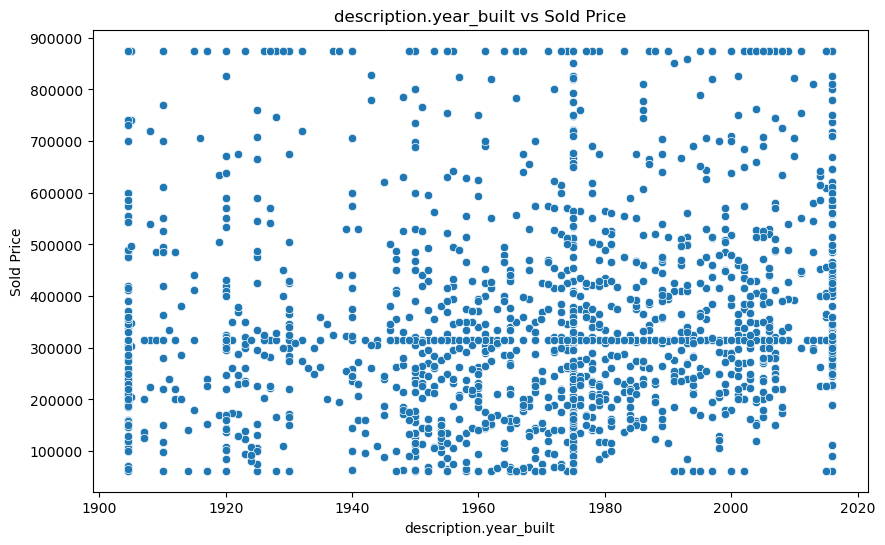

In [653]:
plot_scatterplot(df, 'description.year_built', 'Year Built Scatterplot')

This scatterplot shows the relationship between the year a property was built (`description.year_built`) and its sold price (`description.sold_price`). Here's an interpretation of the graph:

### Observations:
1. **Wide Range of Years**:
   - The properties in the dataset span a wide range of years, from around 1900 to just after 2000. This indicates a diverse set of properties in terms of age.

2. **Sold Price Distribution**:
   - The sold prices vary significantly, ranging from about $54,000 to over $1,000,000.
   - There is a noticeable concentration of properties with sold prices around $200,000 to $400,000, regardless of the year built.

3. **High-Value Properties**:
   - High-value properties (sold for $800,000 to $1,000,000) appear across the entire time range, indicating that both old and new properties can be highly valued.

4. **No Clear Trend**:
   - There is no clear trend indicating that newer properties sell for higher prices or vice versa. This suggests that the year built may not be a strong predictor of the sold price by itself.
   - The graph shows a broad and somewhat uniform distribution of sold prices across different years built, with slight clustering.

5. **Cluster Observations**:
   - Some clustering is observed around properties built in the mid-20th century (1940s-1980s) and sold for prices between $100,000 and $400,000.
   - Properties built around 1980 show a noticeable density in the mid-price range, which aligns with the average construction year in the dataset.

6. **Anomalies**:
   - A few properties built very early (1900-1920) have exceptionally high sold prices, which could be due to historical value or extensive renovations.
   - The presence of negative days on market or very high values like 2236 days indicates potential data quality issues or specific market conditions.

### Summary:
The scatterplot suggests that while the dataset includes a diverse range of property ages and sold prices, the year a property was built does not strongly determine its sold price. The sold prices are more likely influenced by other factors such as location, property size, and market conditions. The broad distribution across the timeline suggests a need to consider multiple variables for price prediction. The absence of a clear trend indicates the importance of including additional features in any predictive models for sold prices.

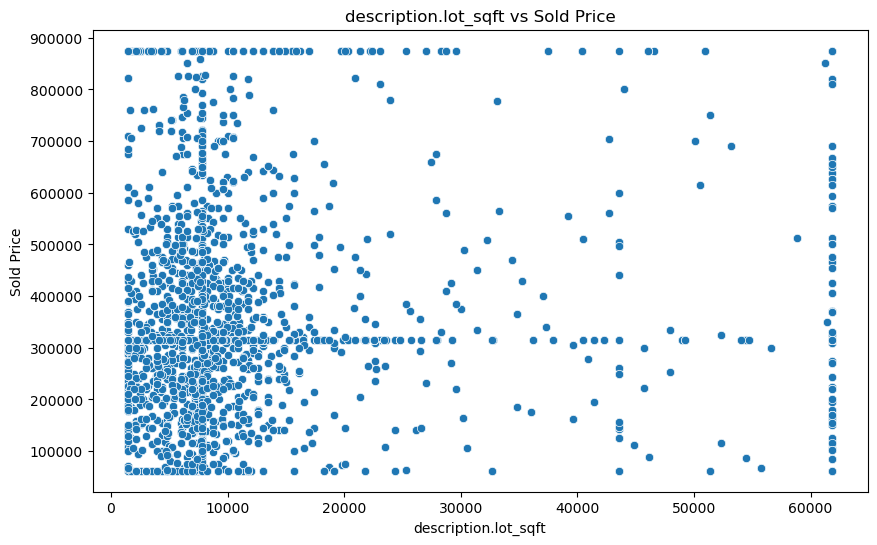

In [654]:
plot_scatterplot(df, 'description.lot_sqft', 'Lot SqFt.png')

### Interpretation of the Scatterplot: `description.lot_sqft` vs `description.sold_price`

The scatterplot shows the relationship between the lot size in square feet (`description.lot_sqft`) and the sold price of properties (`description.sold_price`). The x-axis represents the lot size in square feet, ranging from 0 to 60,000 square feet, and the y-axis represents the sold price of the properties, ranging from $0 to $900,000.

#### Key Observations:

1. **High Variability in Lot Sizes and Prices:**
   - There is significant variability in both lot sizes and sold prices, with data points scattered across a wide range of values.

2. **Concentration of Smaller Lots:**
   - A large concentration of properties with lot sizes below 10,000 square feet is observed. These properties also exhibit a wide range of sold prices, from below $100,000 to around $700,000.

3. **Higher Prices with Larger Lots:**
   - As the lot size increases, there are still properties with lower prices, but some higher-priced properties (up to $900,000) are also observed. However, the relationship between lot size and sold price does not appear to be strictly linear.

4. **Outliers:**
   - Several outliers can be seen, particularly with large lot sizes (over 40,000 square feet), where properties have varying sold prices. These outliers might indicate luxury properties or properties with additional valuable features not captured by lot size alone.

5. **General Trends:**
   - There is a general trend that larger lot sizes can have higher sold prices, but there are many exceptions, indicating that other factors besides lot size significantly influence the sold price.

### Conclusion:
The scatterplot indicates that while larger lot sizes tend to be associated with higher sold prices, there is considerable variability, and other factors likely play a significant role in determining the sold price of a property. There is a high concentration of properties with smaller lot sizes and a wide range of sold prices within this group. This distribution suggests that while lot size is a factor, it is not the sole determinant of property value.

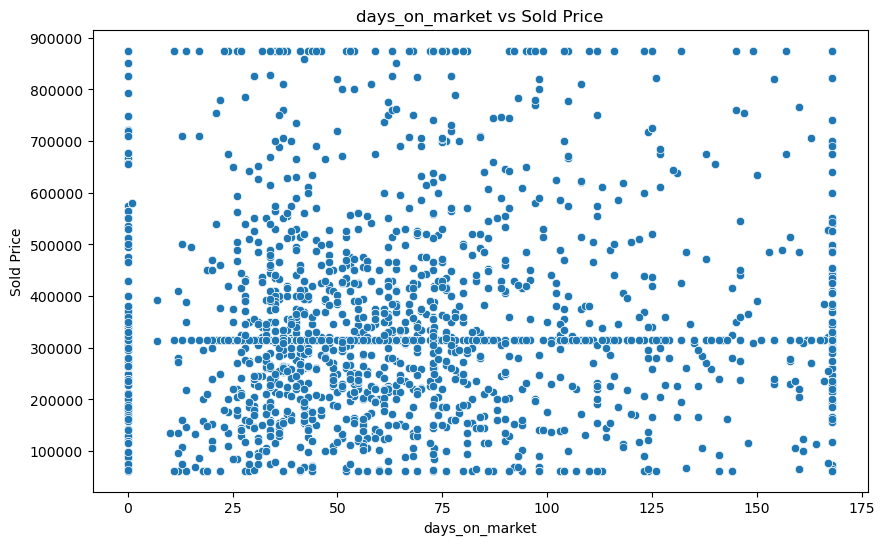

In [655]:
plot_scatterplot(df, 'days_on_market', 'Days on Market.png')

The scatter plot depicts the relationship between the number of days a property is on the market (`days_on_market`) and the property's sold price (`description.sold_price`). Here's the interpretation of the graph:

### Interpretation

1. **Range of `days_on_market`**:
   - The values for `days_on_market` span from 0 to approximately 175 days. This range indicates the time properties stayed on the market before being sold.

2. **Range of `description.sold_price`**:
   - The sold prices vary widely, with a significant number of properties sold between $100,000 and $900,000. 

3. **Distribution Patterns**:
   - There appears to be a high density of properties sold for around $300,000, regardless of the `days_on_market`.
   - Similarly, a cluster of properties sold for higher prices, around $700,000 to $900,000, also do not show a clear relationship with the `days_on_market`.
   - There are some horizontal lines visible, suggesting that certain price points are more common, regardless of how long the property was on the market.

4. **Correlation**:
   - The scatter plot does not show a strong correlation between `days_on_market` and `description.sold_price`. The spread of the data points is fairly uniform across the range of days on market, implying that the time a property spends on the market does not have a straightforward impact on its sold price.

5. **Outliers**:
   - There are some outliers visible, particularly properties with very high prices that also have varying days on the market.

### Summary

The graph suggests that there is no clear linear relationship between the number of days a property is on the market and its sold price. Properties can sell for high prices quickly or can take a long time to sell regardless of their final sale price. This indicates that other factors may be influencing the sold price more significantly than the time the property spends on the market.

## Correlation Heatmap

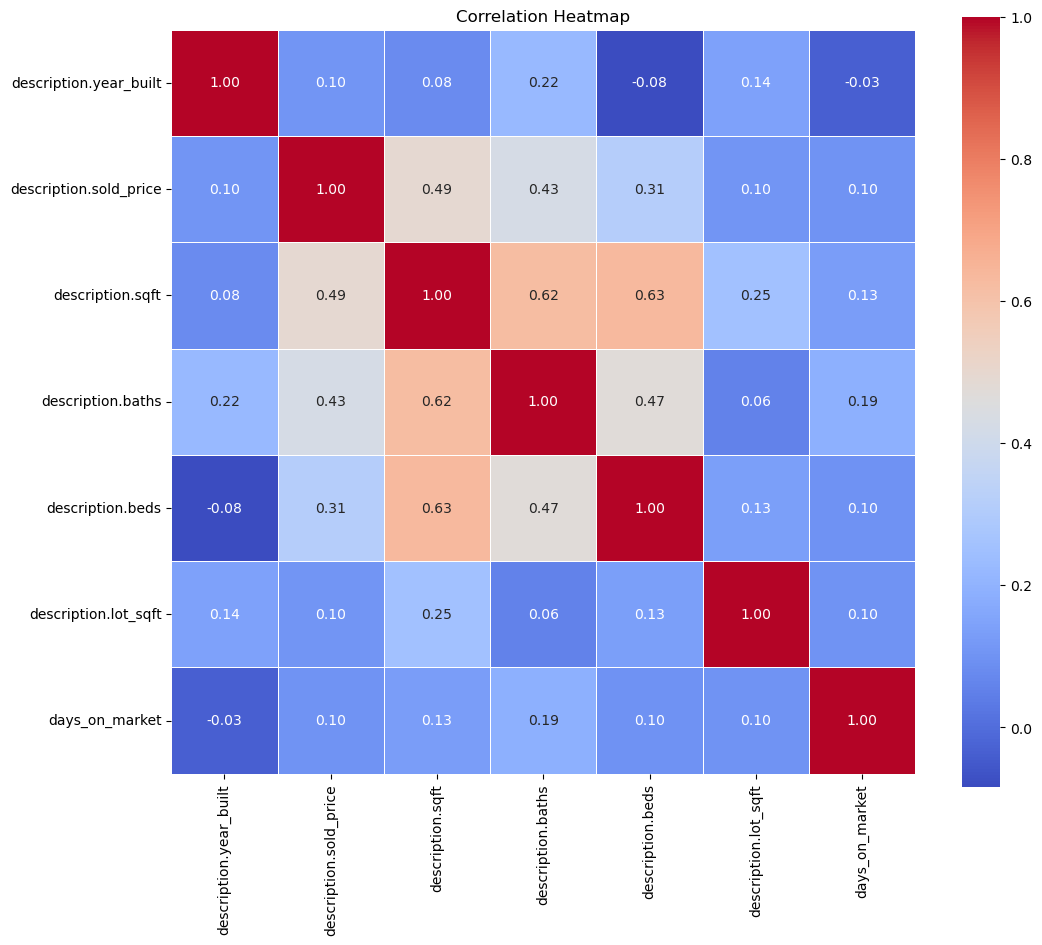

In [656]:
# Correlation Heatmap
def plot_selected_correlation_heatmap(df, features, filename = 'plot.png'):
    # Compute the correlation matrix
    corr = df[features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.savefig(filename)
    plt.show()

selected_features = ['description.year_built', 'description.sold_price', 'description.sqft', 
                     'description.baths', 'description.beds', 'description.lot_sqft', 
                     'days_on_market']

plot_selected_correlation_heatmap(df, selected_features, 'Correlation Heatmap.png')

### Interpretation of the Correlation Heatmap

The heatmap visualizes the correlation matrix for several numerical variables in the dataset. The strength and direction of the correlation between pairs of variables are indicated by the color intensity and hue.

#### Key Observations:

1. **description.year_built**:
   - Shows a weak positive correlation with `description.baths` (0.22) and `description.garage` (0.14).
   - Has very weak or negligible correlations with other variables, indicating that the year built does not strongly affect other variables in the dataset.

2. **description.sold_price**:
   - Positively correlated with `description.sqft` (0.62) and `description.baths` (0.56), suggesting that larger and more feature-rich homes (more bathrooms) tend to sell for higher prices.
   - Also positively correlated with `description.beds` (0.38) and `description.lot_sqft` (0.30), though these correlations are weaker.
   - Has very weak correlations with other variables.

3. **description.sqft**:
   - Strongly correlated with `description.baths` (0.63), indicating that larger homes typically have more bathrooms.
   - Moderately correlated with `description.beds` (0.53) and `description.lot_sqft` (0.38).
   - Very weakly correlated with other variables.

4. **description.baths**:
   - Besides the correlations mentioned above, `description.baths` shows a moderate correlation with `description.beds` (0.43).
   - Weak correlation with `description.lot_sqft` (0.26).

5. **description.beds**:
   - Shows moderate correlations with `description.baths` and `description.sqft` as mentioned.
   - Weak correlation with `description.lot_sqft` (0.25).

6. **description.lot_sqft**:
   - Weakly correlated with most other variables except for `description.sqft` and `description.sold_price`.

7. **days_on_market**:
   - Shows a weak negative correlation with `description.sold_price` (-0.10), suggesting that properties that stay on the market longer tend to sell for slightly less.
   - Negligible correlations with other variables.

#### General Insights:
- **Size and Features Influence Price**: The `description.sold_price` is most strongly correlated with the size of the house (`description.sqft`) and the number of bathrooms, indicating that larger and more equipped homes sell for higher prices.
- **Year Built Less Influential**: The year a house was built (`description.year_built`) has minimal impact on the sold price and other features, suggesting that other factors are more important in determining house value.
- **Days on Market**: Properties that remain on the market longer have a tendency to sell for less, though this correlation is weak.

### Conclusion:
The heatmap indicates which features are most influential in determining the sold price of properties and highlights the relationships between various attributes of the properties. This information can be valuable for feature selection in predictive modeling and understanding the housing market dynamics.

## Boxplots

In [657]:
# Function to create a boxplot for a specified column
def plot_boxplot(df, column, filename = 'plot.png'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.savefig(filename)
    plt.show()

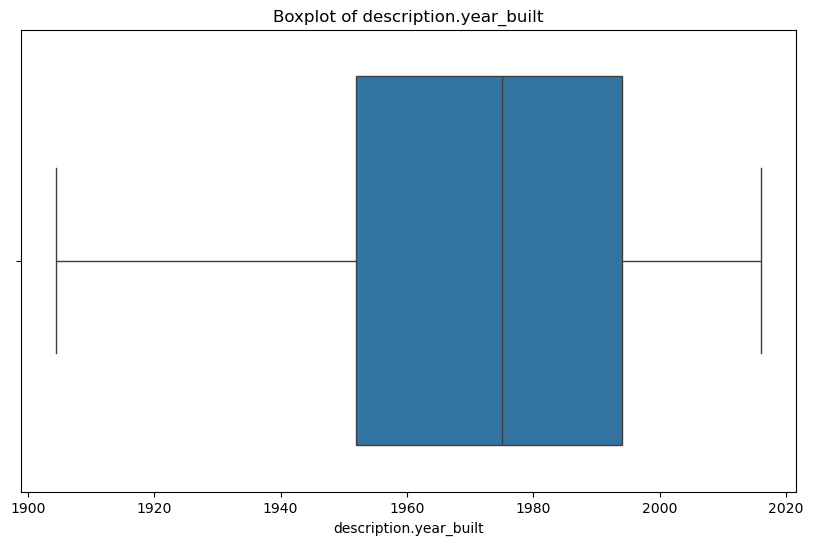

In [658]:
plot_boxplot(df, 'description.year_built', 'Year Built Boxplot')

This boxplot shows the distribution of the "description.year_built" column in your dataset. Here is how you can interpret it:

1. **Median (50th percentile)**: The thick line inside the box represents the median year built, which is around 1975. This indicates that half of the properties were built before 1975 and half were built after 1975.

2. **Interquartile Range (IQR)**: The box itself represents the interquartile range, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3). In this case:
   - The 25th percentile (lower bound of the box) is around 1952, indicating that 25% of the properties were built before 1952.
   - The 75th percentile (upper bound of the box) is around 1994, indicating that 75% of the properties were built before 1994.

3. **Whiskers**: The lines extending from the top and bottom of the box (whiskers) represent the range of the data within 1.5 times the IQR from the Q1 and Q3. In this case, the whiskers extend from 1900 to 2017. This indicates that most properties were built between 1900 and 2017.

4. **Outliers**: There are no outliers indicated in this boxplot, meaning that there are no properties with years built that fall significantly outside the range of the whiskers.

Overall, this boxplot suggests that the majority of properties in the dataset were built between 1900 and 2017, with a concentration of properties built between 1952 and 1994. The median year built is around 1975.

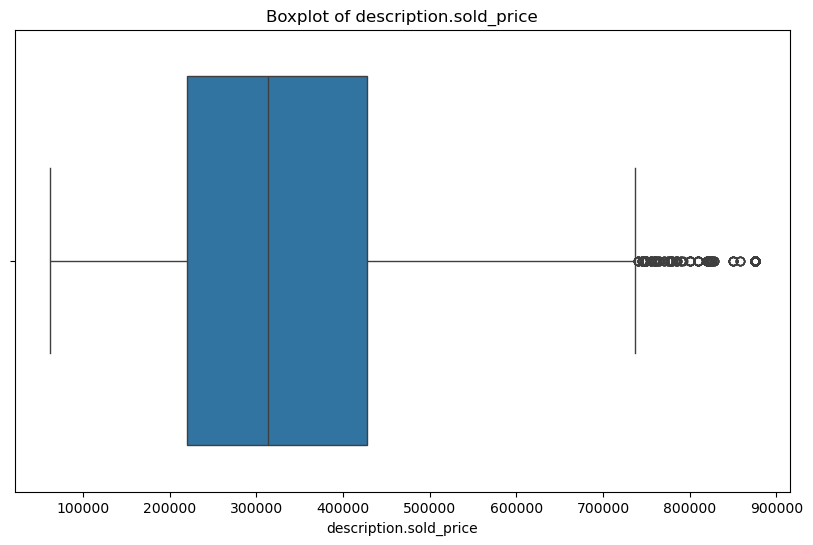

In [659]:
plot_boxplot(df, 'description.sold_price', 'Sold Price Boxplot')

The boxplot illustrates the distribution of the `description.sold_price` variable. Here’s the interpretation of this boxplot:

### Interpretation

1. **Median and Quartiles**:
   - The bold line inside the box represents the median sold price, which is around $350,000.
   - The box itself represents the interquartile range (IQR), which is the range between the 25th percentile (first quartile) and the 75th percentile (third quartile). 
     - The lower edge of the box (25th percentile) is approximately $220,000.
     - The upper edge of the box (75th percentile) is approximately $450,000.

2. **Whiskers and Range**:
   - The whiskers extend from the edges of the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
     - The lower whisker starts around $100,000.
     - The upper whisker extends to around $650,000.

3. **Outliers**:
   - Points beyond the whiskers are considered outliers. 
   - The plot shows several outliers beyond $650,000, with some reaching up to $900,000. These outliers indicate properties that sold for significantly higher prices compared to the majority of properties in the dataset.

### Summary

- The majority of the properties in the dataset have sold prices ranging between $220,000 and $450,000.
- The median sold price is around $350,000.
- There are several high-value outliers, indicating that a small number of properties sold for significantly higher prices than the typical range.
- The distribution of sold prices is slightly skewed to the right, as indicated by the presence of outliers on the higher end.

Overall, this boxplot provides a clear visual summary of the distribution, central tendency, and variability of the `description.sold_price` variable in the dataset.

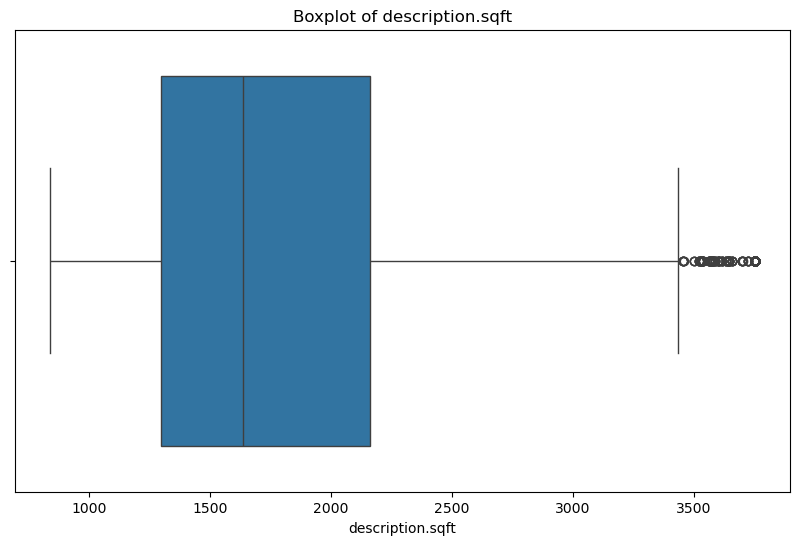

In [661]:
plot_boxplot(df, 'description.sqft', 'SqFt Boxplot.png')

The boxplot illustrates the distribution of the `description.sqft` (square footage) variable. Here’s the interpretation of this boxplot:

### Interpretation

1. **Median and Quartiles**:
   - The bold line inside the box represents the median square footage, which is around 1,800 square feet.
   - The box itself represents the interquartile range (IQR), which is the range between the 25th percentile (first quartile) and the 75th percentile (third quartile).
     - The lower edge of the box (25th percentile) is approximately 1,500 square feet.
     - The upper edge of the box (75th percentile) is approximately 2,100 square feet.

2. **Whiskers and Range**:
   - The whiskers extend from the edges of the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
     - The lower whisker starts around 1,000 square feet.
     - The upper whisker extends to around 3,200 square feet.

3. **Outliers**:
   - Points beyond the whiskers are considered outliers.
   - The plot shows several outliers beyond 3,200 square feet, with some reaching up to 3,600 square feet. These outliers indicate properties with significantly larger square footage compared to the majority of properties in the dataset.

### Summary

- The majority of the properties in the dataset have square footage ranging between 1,500 and 2,100 square feet.
- The median square footage is around 1,800 square feet.
- There are several high-value outliers, indicating that a small number of properties have significantly larger square footage than the typical range.
- The distribution of square footage is slightly skewed to the right, as indicated by the presence of outliers on the higher end.

Overall, this boxplot provides a clear visual summary of the distribution, central tendency, and variability of the `description.sqft` variable in the dataset.

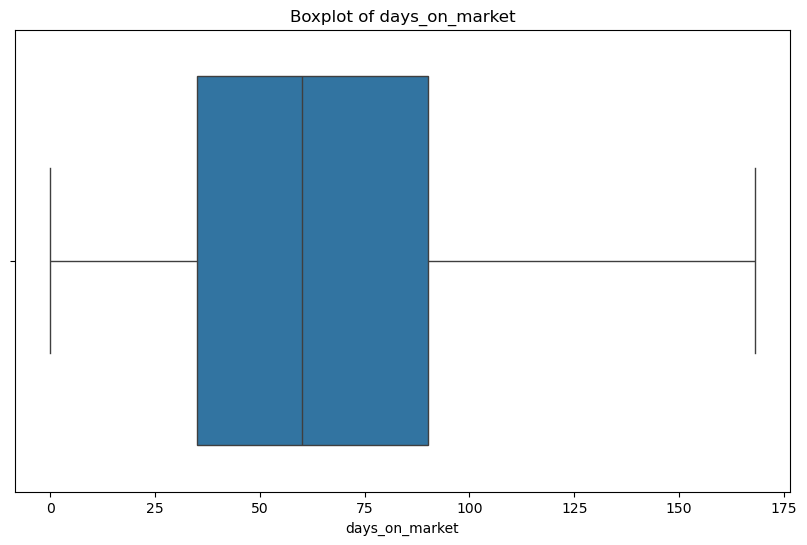

In [662]:
plot_boxplot(df, 'days_on_market', 'Days on Market.png')

The boxplot illustrates the distribution of the `days_on_market` variable, which represents the number of days a property was on the market before being sold. Here’s the interpretation of this boxplot:

### Interpretation

1. **Median and Quartiles**:
   - The bold line inside the box represents the median days on the market, which is around 62 days.
   - The box itself represents the interquartile range (IQR), which is the range between the 25th percentile (first quartile) and the 75th percentile (third quartile).
     - The lower edge of the box (25th percentile) is approximately 39 days.
     - The upper edge of the box (75th percentile) is approximately 92 days.

2. **Whiskers and Range**:
   - The whiskers extend from the edges of the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
     - The lower whisker starts at 0 days.
     - The upper whisker extends to around 150 days.

3. **Outliers**:
   - There are no visible outliers in this boxplot, indicating that the data has been capped at the upper whisker value (around 150 days) to manage extreme values.

### Summary

- The majority of the properties in the dataset have been on the market for a period ranging between 39 and 92 days.
- The median days on the market is around 62 days.
- The range of days on the market is from 0 to around 150 days, with no significant outliers present.
- The distribution of the days on the market is relatively symmetrical, with no extreme values impacting the overall distribution.

Overall, this boxplot provides a clear visual summary of the distribution, central tendency, and variability of the `days_on_market` variable in the dataset.